In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import umap.plot
from collections import defaultdict

C:\Users\Camila - bioinfo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Camila - bioinfo\anaconda3\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
pca_ld03 = pd.read_csv('PCA_ld03_eigenvec.txt', sep=' ', header=None)
pca_ld08 = pd.read_csv('PCA_ld08_eigenvec.txt', sep=' ', header=None)

In [15]:
kgp = pd.read_csv('1000GenomesPops.txt', sep='\t')
nat = pd.read_csv('NAT.txt', sep='\t', header=None).drop(columns=[1])

populations = ['YRI', 'CEU', 'PEL', 'PUR', 'CLM', 'MXL', 'NAT'] 
pop_kgp = kgp.loc[kgp['SubPopulation'].isin(populations)] #filtrando as subpopulações
pop_kgp =pop_kgp.drop(columns=['Family.ID', 'Population.Description', 'Gender']) #excluindo colunas

nat.rename(columns={0: "Sample"}, inplace=True) #renomeando coluna
nat = nat.assign(SubPopulation = 'NAT', Population='NAT') #adicionando colunas de subpop e pop

target_pop = pd.concat([pop_kgp, nat], ignore_index=True) #concatenação dos dataframes

In [134]:
pca_ld03 = pca_ld03[pca_ld03[1].isin(target_pop['Sample'])]
pca_ld08 = pca_ld08[pca_ld08[1].isin(target_pop['Sample'])]

In [67]:
popul_by_ind = defaultdict(int)

for tupla in target_pop.itertuples():
    sample = tupla[1]
    subpop = tupla[2]
    popul_by_ind[sample] = subpop #sample de cada subpopulação

In [97]:
pop_by_continent = {'EUR':['CEU'], 'AMR':['CLM', 'MXL', #subpopulação por continente
                                          'PEL', 'PUR'],
                   'AFR':['YRI'],'NAT':['NAT']}
continents = list(pop_by_continent.keys()) #continentes
individuals = list(pca_ld03[0]) #sample dos individuos

In [102]:
idx_pops_members = defaultdict(list)
for idx, individual in enumerate(individuals):
    idx_pops_members[popul_by_ind[individual]].append(idx) #indicie dos individuos

In [138]:
pca_ld3 = pca_ld03.drop(columns=[0,1]) #excluindo colunas de sample
pca_ld3 = pca_ld3.to_numpy(dtype='float32') #transformando em array

pca_ld8 = pca_ld08.drop(columns=[0,1]) #excluindo colunas de sample
pca_ld8 = pca_ld8.to_numpy(dtype='float32')

In [157]:
umap_proj3 = umap.UMAP(n_neighbors=15, min_dist=0.001).fit(pca_ld3[:, :])
umap_proj8 = umap.UMAP(n_neighbors=15, min_dist=0.001).fit(pca_ld8[:, :])

In [126]:
color_dict = {'CEU':'#FF0000', 'CLM':'#FF00B1',
             'MXL':'#0019FF','PEL':'#00C3FF',
             'PUR':'#48FF68', 'YRI':'#FFFF00',
             'NAT':'#FF7300'}

Text(0, 0.5, 'UMAP2')

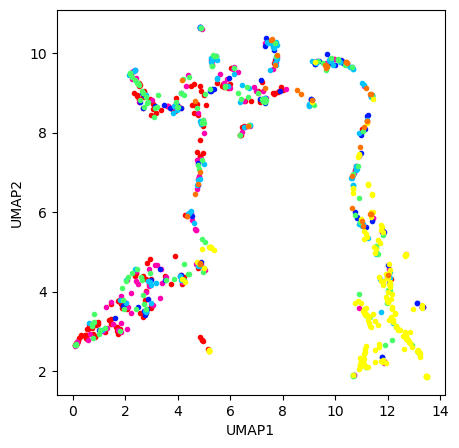

In [158]:
plt.figure(figsize=(5,5))
# Use the PCA projection
dset = umap_proj3.embedding_

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        plt.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[pop])

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

In [152]:
?umap.plot.connectivity

Object `umap.plot.connectivity` not found.


<Axes: >

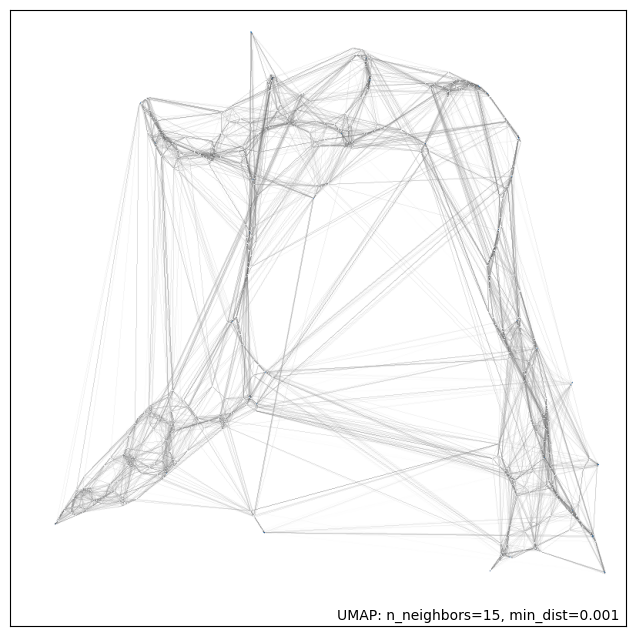

In [159]:
umap.plot.connectivity(umap_proj3, show_points=True)

In [129]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

# parameters for plots
point_alpha = 0.3 # alpha parameter for points
fsize = 10 # font size for labels
lwidth = 0.5 # line width for labels

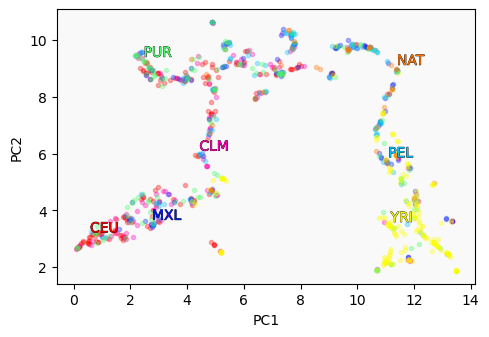

In [161]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect=1)

ax.set_facecolor('#f9f9f9')

dset = umap_proj3.embedding_

texts = []

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        plt.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[pop], alpha=point_alpha)
        
        for i, temp_proj_sub in enumerate(temp_proj):
            if i==temp_proj.shape[0]-1:
                texts.append(ax.text(temp_proj_sub[0], temp_proj_sub[1], pop,
                                     fontdict={"color": color_dict[pop], "size": fsize},
                                     path_effects=[PathEffects.withStroke(linewidth=lwidth, foreground="black")]))

adjust_text(texts)

plt.style.use(['default'])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()

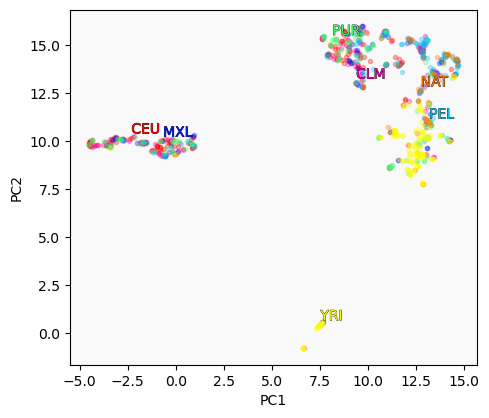

In [160]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect=1)

ax.set_facecolor('#f9f9f9')

dset = umap_proj8.embedding_

texts = []

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        plt.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[pop], alpha=point_alpha)
        
        for i, temp_proj_sub in enumerate(temp_proj):
            if i==temp_proj.shape[0]-1:
                texts.append(ax.text(temp_proj_sub[0], temp_proj_sub[1], pop,
                                     fontdict={"color": color_dict[pop], "size": fsize},
                                     path_effects=[PathEffects.withStroke(linewidth=lwidth, foreground="black")]))

adjust_text(texts)

plt.style.use(['default'])
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()